## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls. 
* Include a print log of each city as it's being processed with the city number, city name, and requested URL.
* Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must use the Matplotlib and Seaborn libraries.
* You must include a written description of three observable trends based on the data. 
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.
* You must include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.  
* See [Example Solution](WeatherPy_Example.pdf) for a reference on expected format. 

## Hints and Considerations

* You may want to start this assignment by refreshing yourself on 4th grade geography, in particular, the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm). 

* Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

* Though we've never worked with the [citipy Python library](https://pypi.python.org/pypi/citipy), push yourself to decipher how it works, and why it might be relevant. Before you try to incorporate the library into your analysis, start by creating simple test cases outside your main script to confirm that you are using it correctly. Too often, when introduced to a new library, students get bogged down by the most minor of errors -- spending hours investigating their entire code -- when, in fact, a simple and focused test would have shown their basic utilization of the library was wrong from the start. Don't let this be you!

* Part of our expectation in this challenge is that you will use critical thinking skills to understand how and why we're recommending the tools we are. What is Citipy for? Why would you use it in conjunction with the OpenWeatherMap API? How would you do so?

* In building your script, pay attention to the cities you are using in your query pool. Are you getting coverage of the full gamut of latitudes and longitudes? Or are you simply choosing 500 cities concentrated in one region of the world? Even if you were a geographic genius, simply rattling 500 cities based on your human selection would create a biased dataset. Be thinking of how you should counter this. (Hint: Consider the full range of latitudes).

* Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!

### Three observable trends based on the data
- Cities nearest to the equator (latitude 0) tend to have the highest max temperature.  Cities further away (latitude <-45 or >+45) tend to have lower max temperatures.
- City wind speeds are lowest around the equator, and are higher at latitudes away from the equator.  This suggests that wind speed and max temperature are inversely correlated.
- In this sampling of data, there were no cities found below -60 degrees latitude south of the equator.

In [1]:
import openweathermapy as ow
from citipy import citipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
import requests
import datetime as dt

from localenv import api_key

In [2]:
# set up parameters dictionary and base url
params = {"appid": api_key,
          "units": "Imperial"}
url = "http://api.openweathermap.org/data/2.5/weather?"
# api_key = "25bc90a1196e6f153eece0bc0b0fc9eb", saved into localenv file

In [4]:
# Generate list of 500 cities (generate smaller list while testing)
cities = []
count = 0
total = 500

while (count<total):
    lat = random.randint(-90,91)
    lon = random.randint(-180,181)
    city = citipy.nearest_city(lat,lon)
    city_name = city.city_name
    # if statement to avoid duplicate cities
    if city_name not in cities:
        # checking long lists takes longer time
        # linear time vs constant time example. use hash table
        # c = set(), for loop check, c.add(city)
        cities.append(city_name)
    # set count to number of cities, exits loop once # of cities requirement met
    count = len(cities)
    
count

500

In [5]:
# set up dataframe to store city weather metrics
cities_df = pd.DataFrame({"City": cities})
cities_df['Max Temperature'] = ""
cities_df['Humidity'] = ""
cities_df['Cloudiness'] = ""
cities_df['Wind Speed'] = ""
cities_df['Latitude'] = ""
cities_df['Longitude'] = ""
cities_df.head()

,City,Max Temperature,Humidity,Cloudiness,Wind Speed,Latitude,Longitude
0,ruteng,,,,,,
1,mudgee,,,,,,
2,avarua,,,,,,
3,kaduqli,,,,,,
4,granada,,,,,,


In [6]:
# Loop through the cities_df and search for weather data of each city
print(f"Begin Data Retrieval")
print(f"-"*60)
# record date data retrieval occurred
date = dt.date.today()

for index, row in cities_df.iterrows():
    # update parameter to city
    params['q'] = f"{row['City']}"

    # make request, print url
    response = requests.get(url,params = params)
    print(f"Processing Record {index+1} of {count} | {row['City']} \
          \n{response.url}")
    # convert to json
    response_json = response.json()
    
    try:
        cities_df.at[index, "Max Temperature"]=response_json["main"]["temp_max"]
        cities_df.at[index, "Humidity"]= response_json["main"]["humidity"]
        cities_df.at[index, "Cloudiness"]= response_json["clouds"]["all"]
        cities_df.at[index, "Wind Speed"]= response_json["wind"]["speed"]
        cities_df.at[index, "Latitude"]= response_json["coord"]["lat"]
        cities_df.at[index, "Longitude"]= response_json["coord"]["lon"]
    except (KeyError, IndexError) as e:
        print(f"Error at {row['City']}, dropping city: {e}")
        cities_df.drop(index,axis=0,inplace=True)

print(f"-"*60)
print(f"End Data Retrieval")
print(f"-"*60)   

Begin Data Retrieval
------------------------------------------------------------
Processing Record 1 of 500 | ruteng           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=ruteng
Processing Record 2 of 500 | mudgee           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=mudgee
Processing Record 3 of 500 | avarua           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=avarua
Processing Record 4 of 500 | kaduqli           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=kaduqli
Processing Record 5 of 500 | granada           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=granada
Processing Record 6 of 500 | ankara           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc

Processing Record 51 of 500 | saint-georges           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=saint-georges
Processing Record 52 of 500 | lompoc           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=lompoc
Processing Record 53 of 500 | saint-philippe           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=saint-philippe
Processing Record 54 of 500 | vaini           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=vaini
Processing Record 55 of 500 | magistralnyy           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=magistralnyy
Processing Record 56 of 500 | busselton           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=busselton
Proces

Processing Record 101 of 500 | hilo           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=hilo
Processing Record 102 of 500 | belushya guba           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=belushya+guba
Error at belushya guba, dropping city: 'main'
Processing Record 103 of 500 | maridi           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=maridi
Error at maridi, dropping city: 'main'
Processing Record 104 of 500 | novikovo           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=novikovo
Processing Record 105 of 500 | yellowknife           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=yellowknife
Processing Record 106 of 500 | almaznyy           
http://api.openweathermap.org/data/2.5/weathe

Processing Record 149 of 500 | marawi           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=marawi
Processing Record 150 of 500 | bethel           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=bethel
Processing Record 151 of 500 | agva           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=agva
Error at agva, dropping city: 'main'
Processing Record 152 of 500 | galveston           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=galveston
Processing Record 153 of 500 | port keats           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=port+keats
Processing Record 154 of 500 | bindura           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=bindu

Processing Record 197 of 500 | taltal           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=taltal
Processing Record 198 of 500 | savinskiy           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=savinskiy
Processing Record 199 of 500 | aswan           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=aswan
Processing Record 200 of 500 | arkhangelos           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=arkhangelos
Error at arkhangelos, dropping city: 'main'
Processing Record 201 of 500 | cururupu           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=cururupu
Processing Record 202 of 500 | clyde river           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&uni

Processing Record 247 of 500 | ha giang           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=ha+giang
Processing Record 248 of 500 | saint anthony           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=saint+anthony
Processing Record 249 of 500 | diamantino           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=diamantino
Processing Record 250 of 500 | port augusta           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=port+augusta
Processing Record 251 of 500 | medina           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=medina
Processing Record 252 of 500 | russell           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=russell
Proces

Processing Record 297 of 500 | hamilton           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=hamilton
Processing Record 298 of 500 | vanimo           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=vanimo
Processing Record 299 of 500 | regina           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=regina
Processing Record 300 of 500 | fortuna           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=fortuna
Processing Record 301 of 500 | rio grande           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=rio+grande
Processing Record 302 of 500 | kiruna           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=kiruna
Processing Record 303 of 500 | b

Processing Record 346 of 500 | santiago del estero           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=santiago+del+estero
Processing Record 347 of 500 | palabuhanratu           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=palabuhanratu
Error at palabuhanratu, dropping city: 'main'
Processing Record 348 of 500 | mandurah           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=mandurah
Processing Record 349 of 500 | sao mateus           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=sao+mateus
Processing Record 350 of 500 | sioux lookout           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=sioux+lookout
Processing Record 351 of 500 | samus           
http://api.openweathermap.org/data/2.5/weathe

Processing Record 394 of 500 | faanui           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=faanui
Processing Record 395 of 500 | tarnow           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=tarnow
Processing Record 396 of 500 | namibe           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=namibe
Processing Record 397 of 500 | kindia           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=kindia
Processing Record 398 of 500 | berezayka           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=berezayka
Processing Record 399 of 500 | sao francisco           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=sao+francisco
Processing Record 400 of 5

Processing Record 444 of 500 | leh           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=leh
Processing Record 445 of 500 | ordu           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=ordu
Processing Record 446 of 500 | kamogawa           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=kamogawa
Processing Record 447 of 500 | bambanglipuro           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=bambanglipuro
Processing Record 448 of 500 | pimentel           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=pimentel
Processing Record 449 of 500 | san joaquin           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=san+joaquin
Processing Record 450 of

Processing Record 494 of 500 | leshukonskoye           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=leshukonskoye
Processing Record 495 of 500 | urusha           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=urusha
Processing Record 496 of 500 | nong chik           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=nong+chik
Processing Record 497 of 500 | portmore           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=portmore
Processing Record 498 of 500 | taybad           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=taybad
Processing Record 499 of 500 | inhambane           
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=inhambane
Processing Recor

In [7]:
# save data to CSV file
cities_df.to_csv("weatherpy_data.csv", encoding="utf-8",index=False)
cities_df.count()

City               457
Max Temperature    457
Humidity           457
Cloudiness         457
Wind Speed         457
Latitude           457
Longitude          457
dtype: int64

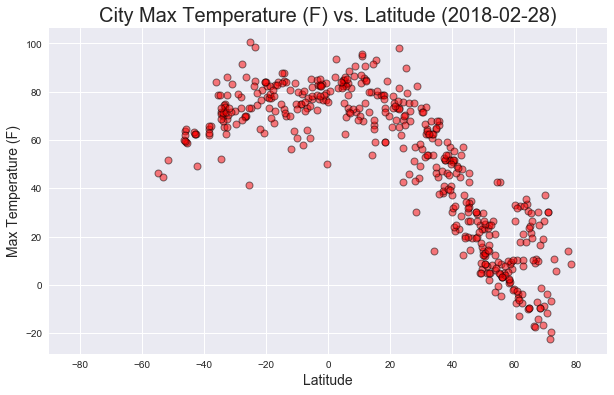

In [8]:
#Temperature (F) vs. Latitude
#Humidity (%) vs. Latitude
#Cloudiness (%) vs. Latitude
#Wind Speed (mph) vs. Latitude

# set up short variables for plotting
lat = cities_df['Latitude']
lon = cities_df['Longitude']
maxtemp = cities_df['Max Temperature']
humid = cities_df['Humidity']
cloud = cities_df['Cloudiness']
windsp = cities_df['Wind Speed']

# set up plot properties
sns.set()
plt.figure(figsize=(10,6))
plt.title(f"City Max Temperature (F) vs. Latitude ({date})", fontsize=20)
plt.xlabel("Latitude", fontsize=14)
plt.xlim(-90,90)
plt.ylabel("Max Temperature (F)", fontsize=14)

# plot data and save
plt.scatter(x=lat,y=maxtemp,
            c='red', edgecolor='black', alpha=0.5, marker='o', linewidths=1)
plt.savefig("Temperature (F) vs. Latitude.png")
plt.show()

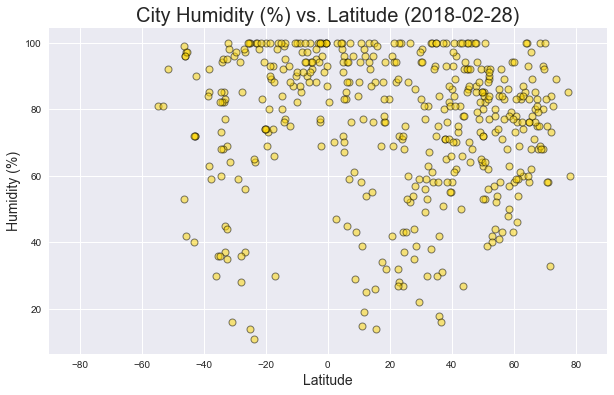

In [9]:
# set up plot properties
sns.set()
plt.figure(figsize=(10,6))
plt.title(f"City Humidity (%) vs. Latitude ({date})", fontsize=20)
plt.xlabel("Latitude", fontsize=14)
plt.xlim(-90,90)
plt.ylabel("Humidity (%)", fontsize=14)

# plot data and save
plt.scatter(x=lat,y=humid,
            c='gold', edgecolor='black', alpha=0.5, marker='o', linewidths=1)
plt.savefig("Humidity (%) vs. Latitude.png")
plt.show()

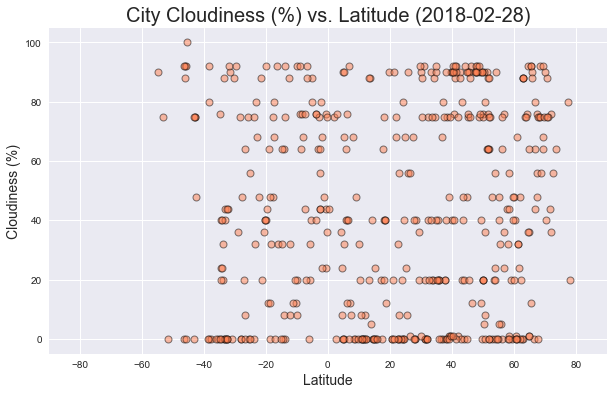

In [10]:
# set up plot properties
sns.set()
plt.figure(figsize=(10,6))
plt.title(f"City Cloudiness (%) vs. Latitude ({date})", fontsize=20)
plt.xlabel("Latitude", fontsize=14)
plt.xlim(-90,90)
plt.ylabel("Cloudiness (%)", fontsize=14)

# plot data and save
plt.scatter(x=lat,y=cloud,
            c='coral', edgecolor='black', alpha=0.5, marker='o', linewidths=1)
plt.savefig("Cloudiness (%) vs. Latitude.png")
plt.show()

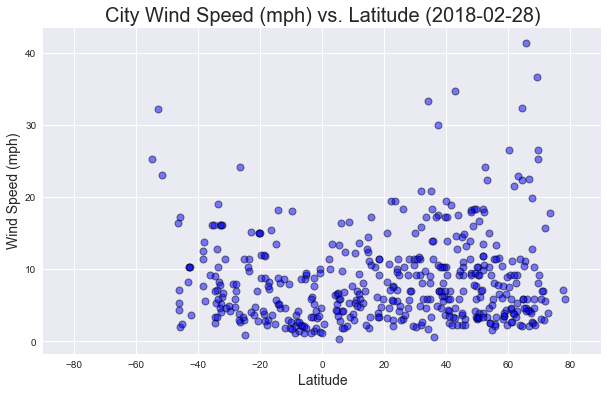

In [12]:
# set up plot properties
sns.set()
plt.figure(figsize=(10,6))
plt.title(f"City Wind Speed (mph) vs. Latitude ({date})", fontsize=20)
plt.xlabel("Latitude", fontsize=14)
plt.xlim(-90,90)
plt.ylabel("Wind Speed (mph)", fontsize=14)

# plot data and save
plt.scatter(x=lat,y=windsp,
            c='blue', edgecolor='black', alpha=0.5, marker='o', linewidths=1)
plt.savefig("Cloudiness (%) vs. Latitude.png")
plt.show()